## Car Price Prediction using Machine Learning with Python

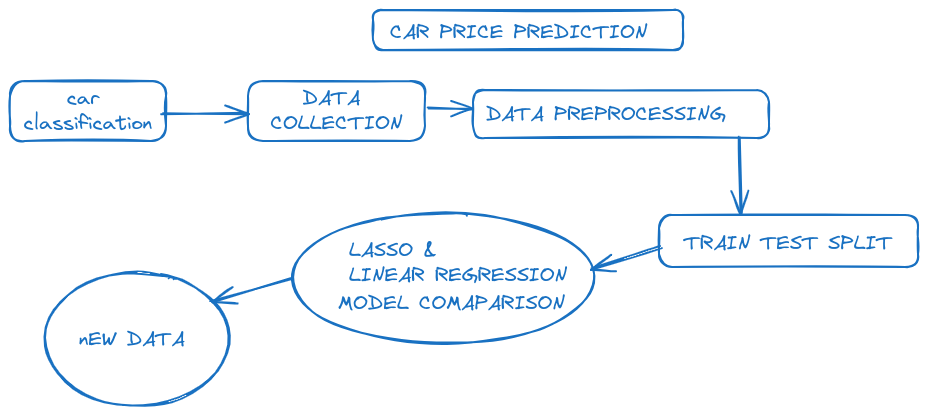

## import  the Required Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression , Lasso

## Data collection and Processing

In [5]:
#collect the data
data=pd.read_csv('/content/car data.csv')

#Check the first rows of the data
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## data cleaning and Preprocessing

In [7]:
#Check the null values in the dataset
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#Check the number of rows and columns
data.shape

(301, 9)

In [9]:
#Check the infor of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#Checking the distribution of the categorical data
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Encoding the categorical data to numerical

In [13]:
# Data Encoding
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [14]:
#Check if the Data is all in categorical values
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Separate the Target and Feature

In [15]:
X=data.drop(['Selling_Price','Car_Name'],axis=1)
Y=data['Seller_Type']

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

## Splitting the data  into training Data and Testing Data

In [18]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (240, 7) (61, 7)


## Model Evaluation and model testing

In [20]:
linear=LinearRegression()

In [21]:
linear.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation on linear regression

In [27]:
test_train=linear.predict(X_train)

error_score=metrics.r2_score(test_train,Y_train)
print("The Accuracy of the Linear regression model is:",error_score)

The Accuracy of the Linear regression model is: 1.0


In [28]:
test_data=linear.predict(X_test)

error_score=metrics.r2_score(test_data,Y_test)
print("The Accuracy of the Linear regression model is:",error_score)

The Accuracy of the Linear regression model is: 1.0


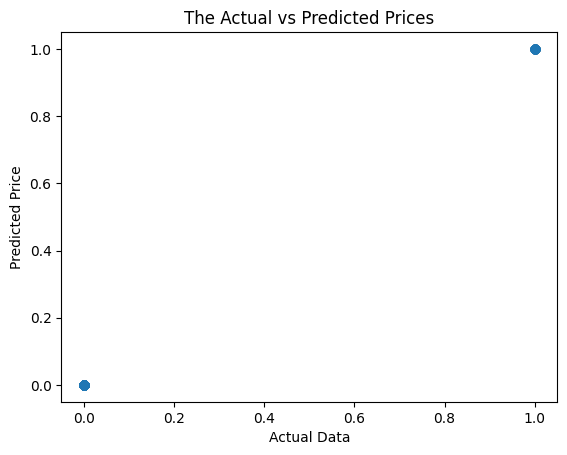

In [30]:
plt.scatter(Y_train,test_train)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Price")
plt.title("The Actual vs Predicted Prices")
plt.show()

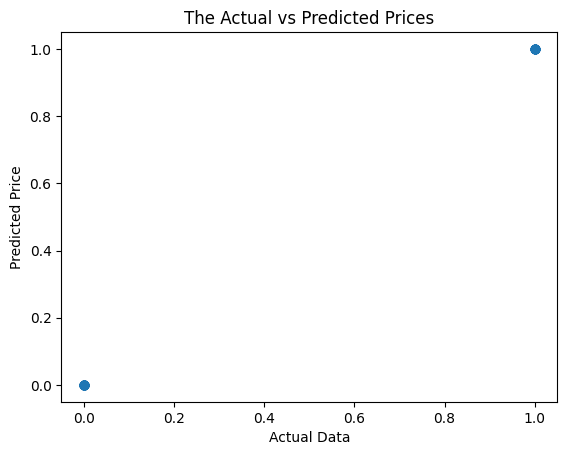

In [31]:
plt.scatter(Y_test,test_data)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Price")
plt.title("The Actual vs Predicted Prices")
plt.show()

In [22]:
lass=Lasso()

In [23]:
lass.fit(X_train,Y_train)

Lasso()

In [32]:
test_train=lass.predict(X_train)

error_score=metrics.r2_score(test_train,Y_train)
print("The Accuracy of the Lasso regression model is:",error_score)

The Accuracy of the Lasso regression model is: -11.945217005852177


In [34]:
test_data=lass.predict(X_test)

error_score=metrics.r2_score(test_data,Y_test)
print("The Accuracy of the Lasso regression model is:",error_score)

The Accuracy of the Lasso regression model is: -15.93291899652894
